In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Analysis of synthetic signals

In [2]:
# parameters
dt = 1
N = 10**3
t = np.array([i*dt for i in range(N)])

In [3]:
def sinusoidal(A,f,t):
    return A*np.sin(2*np.pi*f*t)

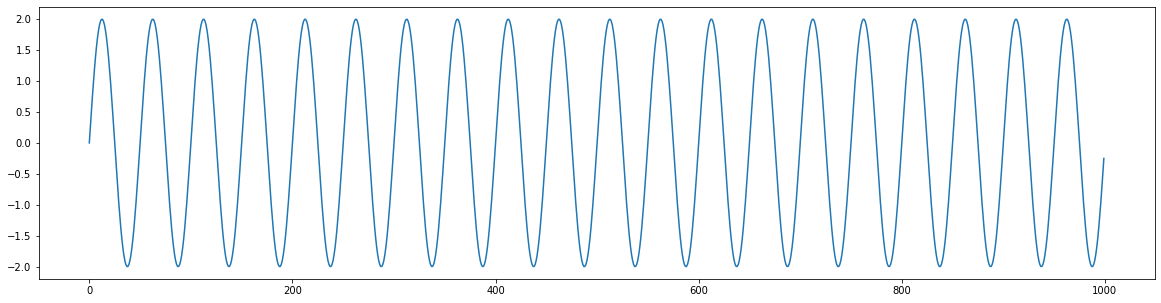

In [4]:
y= sinusoidal(2,0.02,t) # plotting an exqmple of low f

plt.figure(figsize=(20,5))
plt.plot(t,y)

In [5]:
def manual_FT(s,dt=1):
    Nmax = len(s)
    T = dt*Nmax
    
    ans = np.zeros([Nmax],dtype=complex)
    for i in range(Nmax):
        ans[i] = (1/Nmax) * np.sum([s[l]*np.exp(-(2j)*np.pi*i*l/Nmax) for l in range(Nmax)])

    
    return ans
 
    
def manual_PSD(signal,dt=1):
    u = manual_FT(signal,dt)
    Nmax = len(u)
    T = dt*Nmax
    n2 = int(Nmax/2)
    
    s = 2*T*np.abs(u[:n2])**2
    freq = [n/T for n in range(n2)]
    return freq,s
    
    
    

Text(0.5, 1.0, 'Spectral Energy Density for f = 0.02')

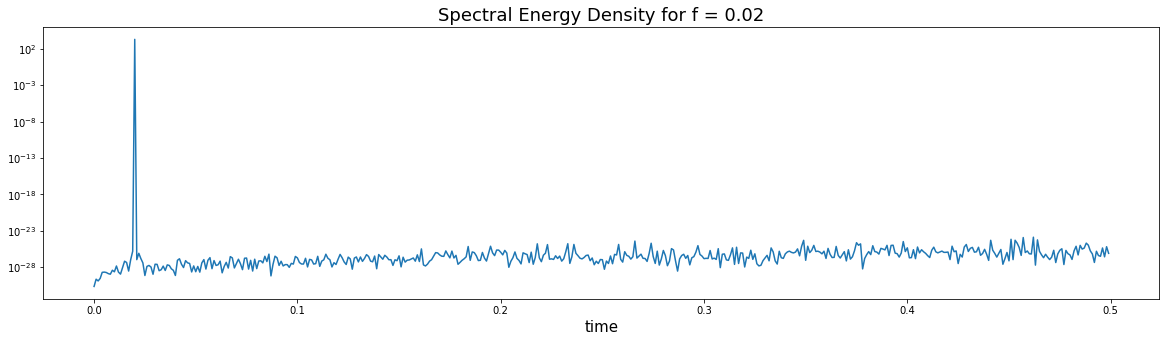

In [28]:
freq,psd = manual_PSD(y)

plt.figure(figsize=(20,5))
plt.plot(freq,psd)
plt.yscale("log")
plt.xlabel("time",fontsize=15)
plt.title("Spectral Energy Density for f = 0.02",fontsize=18)

As expected, the peak is in the assigned frequency while the other parts of the spectra have a PSD of the order <$10^{-23}$

In [7]:
# amplitude and frequency constants for sin functions
A0 = 3 
A1 = 5
f0 = 0.1
f1 = 0.03

# building y1 and y2
y_1 = sinusoidal(A0,f0,t)+sinusoidal(A1,f1,t)
y_2 = sinusoidal(A0,f0,t)
y_2[int(len(t)/2):] = sinusoidal(A1,f1,t[int(len(t)/2):])

#obtaining PSD
freq1,psd1 = manual_PSD(y_1)
freq2,psd2 = manual_PSD(y_2)

Text(0.5, 0, 'frequency')

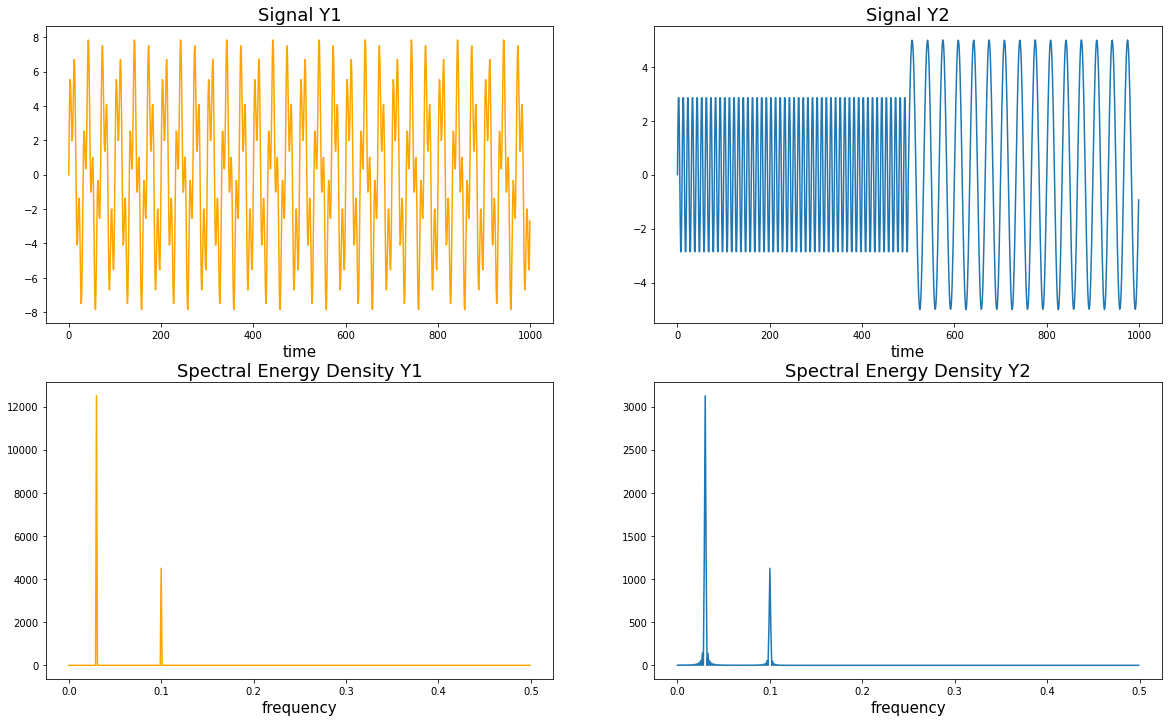

In [24]:


plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.title("Signal Y1",fontsize=18)
plt.plot(t,y_1,c="orange")
plt.xlabel("time",fontsize=15)


plt.subplot(2,2,3)
plt.title("Spectral Energy Density Y1",fontsize=18)
plt.plot(freq1,psd1,c="orange")
plt.xlabel("frequency",fontsize=15)



plt.subplot(2,2,2)
plt.title("Signal Y2",fontsize=18)
plt.plot(t,y_2)
plt.xlabel("time",fontsize=15)

plt.subplot(2,2,4)
plt.title("Spectral Energy Density Y2",fontsize=18)
plt.plot(freq2,psd2)
plt.xlabel("frequency",fontsize=15)





## wavelet transformation

In [29]:
def psi_0(w,t,conjug=1):
    sign = -1**(conjug)
    return (np.pi**(-1/4) * np.exp(sign * 1j * w * t) * np.exp(-0.5*t**2))

In [39]:
def wavelet(y,dt):
    N = len(y)
    M = int(8 * np.log2(N / 2))
    dm = 1/8
    
    freqs = [dt*2**(1+m*dm) for m in range(M+1)]
    Ws = []
    
    def wav(f,dt):
        return np.sum( [y[j]*psi_0(freq) for j in range(N)] )

        for m in range(M+1):
        
        
            
            tau_m = 2**(dt + m/8)
        
        W = 0
        
        for j in range(N):
            W += y[j]*psi_0(wo,j*dt,-1)
        Ws.append(W)
    return Ws
        

In [40]:
wavelet(y_2,dt)

[(1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.117201233713323-0.02912737337283606j),
 (1.1172012